In [2]:
import pandas as pd

# Load the datasets
test_df = pd.read_csv('C://Users//Nitin//Downloads//XGBM & LGBM//Titanic_test.csv')
train_df = pd.read_csv('C://Users//Nitin//Downloads//XGBM & LGBM//Titanic_train.csv')

In [3]:
# Add a column to indicate whether a row is from the train or test set
train_df['is_train'] = 1
test_df['is_train'] = 0

# Merge the datasets
combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Display the first few rows of the combined dataset
print(combined_df.head())

   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  is_train  
0      0         A/5 21171   7.2500   NaN        S         1  
1      0          PC 17599  71.2833   C85        C         1  
2      0  STON/O2. 3101282   7.9250   NaN        S         1  
3      0            113803  53.1000  C123        S         1  
4    

In [4]:
# Check for missing values
missing_values = combined_df.isnull().sum()
print(missing_values)

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
is_train          0
dtype: int64


# Explore Data Distributions


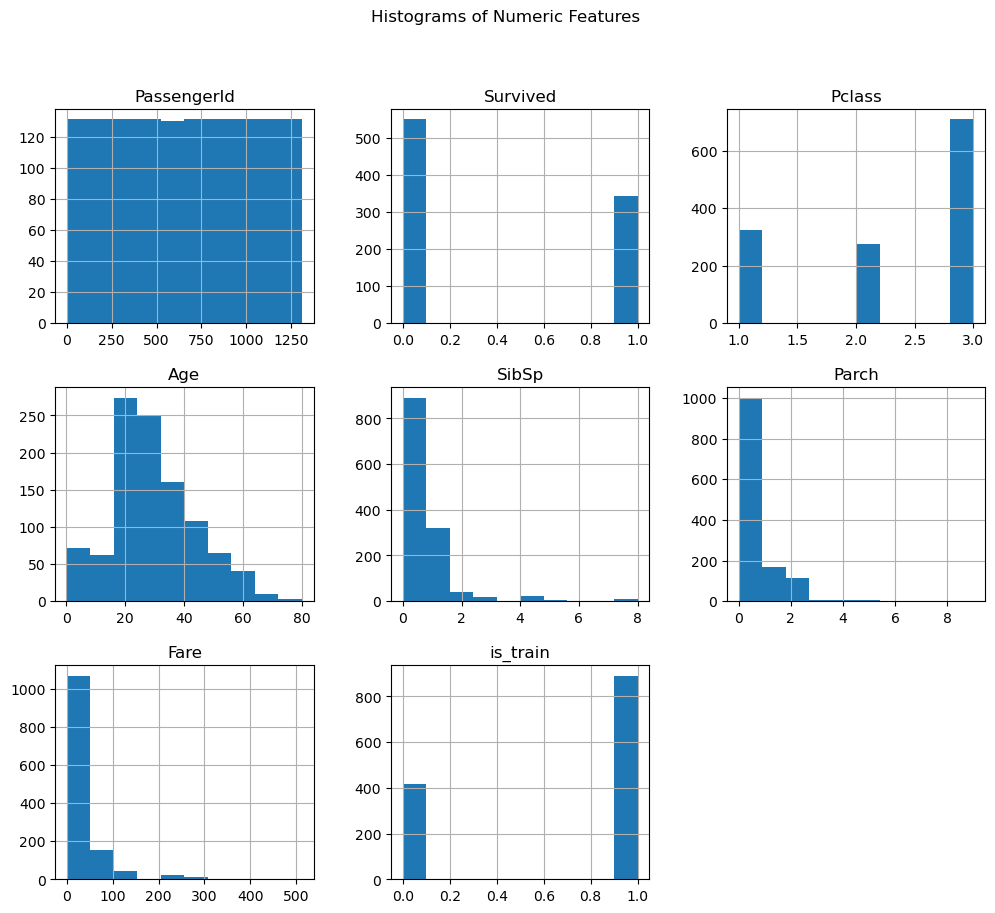

In [5]:
#Histograms
import matplotlib.pyplot as plt

# Plot histograms for numeric features
combined_df.hist(figsize=(12, 10))
plt.suptitle('Histograms of Numeric Features')
plt.show()

# Box Plots

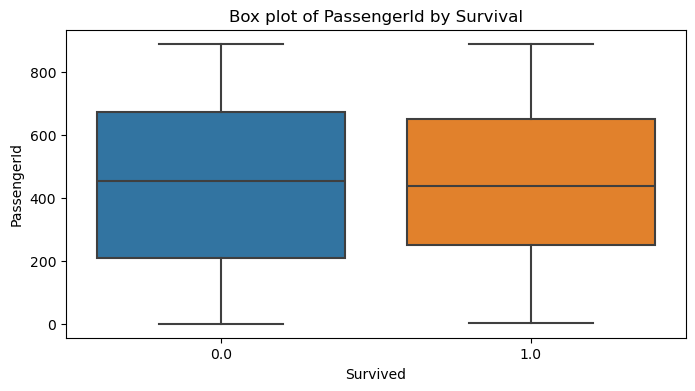

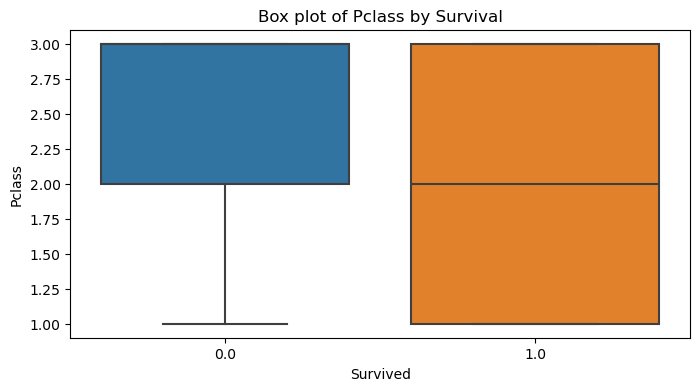

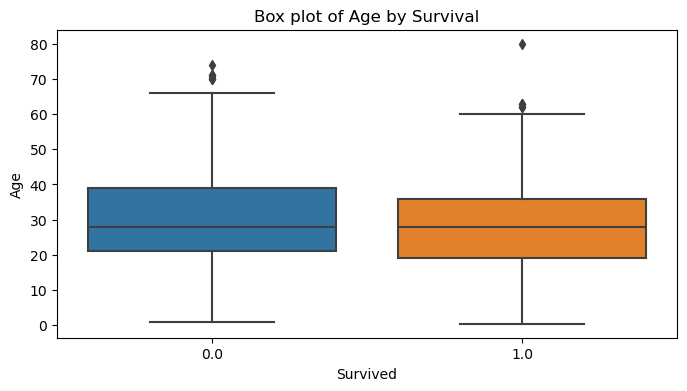

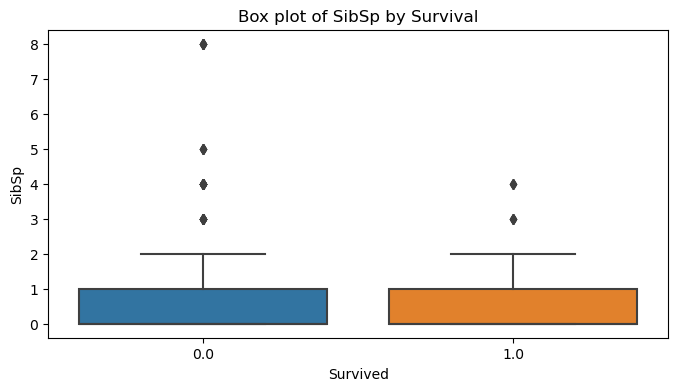

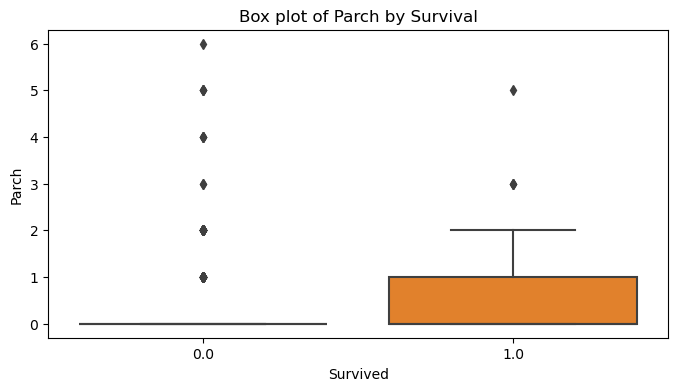

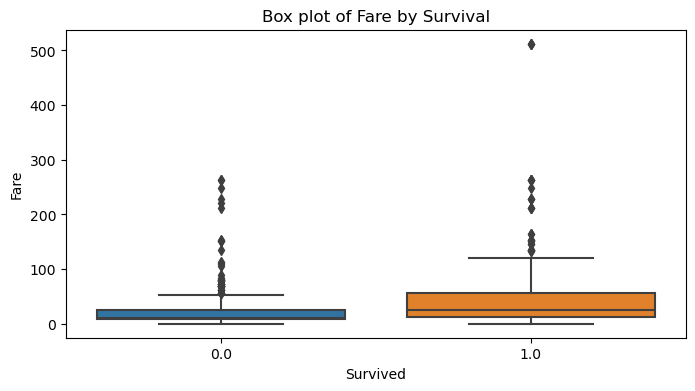

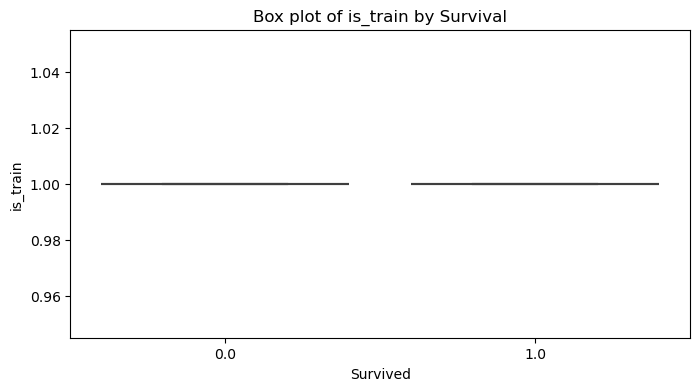

In [6]:
import seaborn as sns

# Plot box plots for numeric features grouped by survival status
numeric_features = combined_df.select_dtypes(include=['float64', 'int64']).columns
for feature in numeric_features:
    if feature != 'Survived':  # Exclude 'Survived' if it is in the dataset
        plt.figure(figsize=(8, 4))
        sns.boxplot(x='Survived', y=feature, data=combined_df)
        plt.title(f'Box plot of {feature} by Survival')
        plt.show()

# Visualize Relationships Between Features and Survival

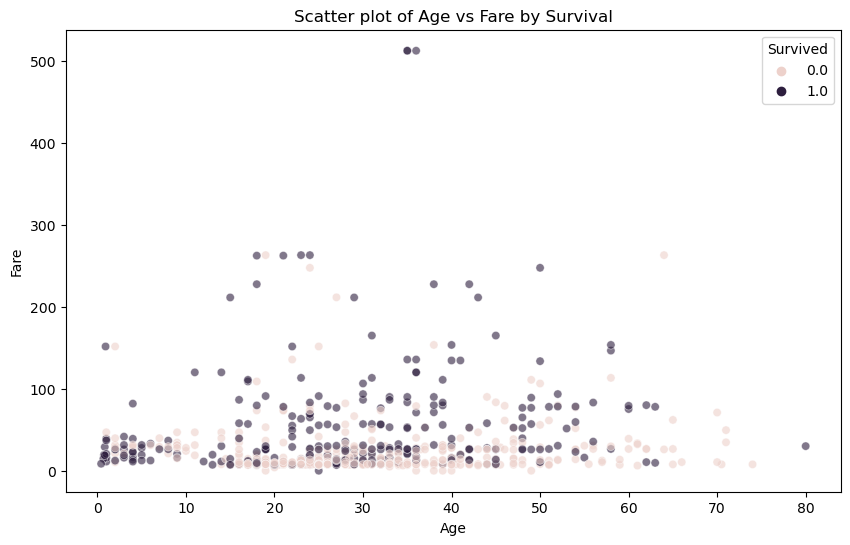

In [7]:
# Scatter plot example: Age vs Fare colored by Survival status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=combined_df, alpha=0.6)
plt.title('Scatter plot of Age vs Fare by Survival')
plt.show()

# Bar Plots

C:\Users\Nitin\AppData\Local\Temp\ipykernel_7528\2288340695.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=combined_df, ci=None)


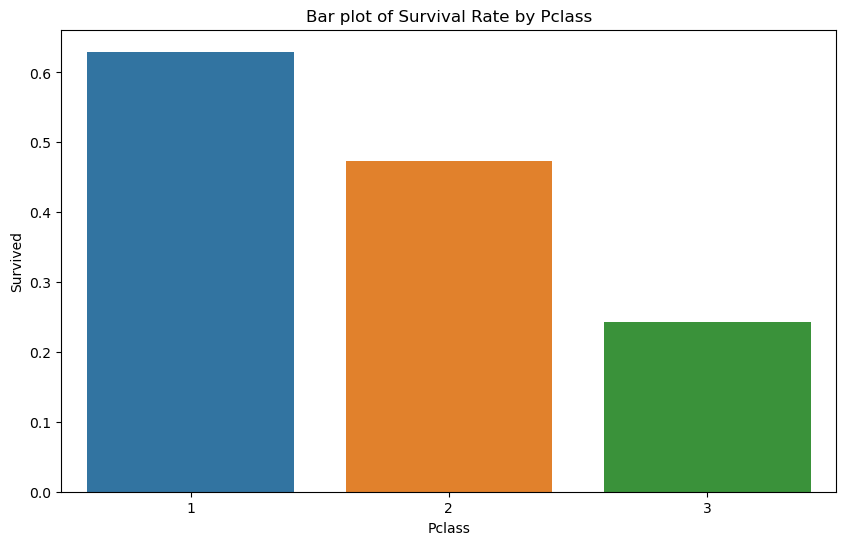

In [8]:
# Bar plot example: Survival rate by Pclass
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=combined_df, ci=None)
plt.title('Bar plot of Survival Rate by Pclass')
plt.show()

# Data Preprocessing:

In [9]:
# Impute Missing Values
from sklearn.impute import SimpleImputer

# Define imputers
num_imputer = SimpleImputer(strategy='median')  # For numeric features
cat_imputer = SimpleImputer(strategy='most_frequent')  # For categorical features

In [10]:
# Separate numeric and categorical features
numeric_features = combined_df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = combined_df.select_dtypes(include=['object']).columns

In [11]:
# Impute numeric features
combined_df[numeric_features] = num_imputer.fit_transform(combined_df[numeric_features])
combined_df[numeric_features]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,is_train
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,1.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0
...,...,...,...,...,...,...,...,...
1304,1305.0,0.0,3.0,28.0,0.0,0.0,8.0500,0.0
1305,1306.0,0.0,1.0,39.0,0.0,0.0,108.9000,0.0
1306,1307.0,0.0,3.0,38.5,0.0,0.0,7.2500,0.0
1307,1308.0,0.0,3.0,28.0,0.0,0.0,8.0500,0.0


In [12]:
# Impute categorical features
combined_df[categorical_features] = cat_imputer.fit_transform(combined_df[categorical_features])

In [15]:
# Check for missing values after imputation
missing_values = combined_df.isnull().sum()
print("Missing values after imputation:",missing_values)

Missing values after imputation: PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
is_train       0
dtype: int64


In [16]:
#. Encode Categorical Variables
# Apply one-hot encoding to categorical features
combined_df_encoded = pd.get_dummies(combined_df, drop_first=True)  # drop_first=True to avoid multicollinearity

In [16]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical features
for feature in categorical_features:
    if combined_df[feature].dtype == 'object':
        combined_df[feature] = label_encoder.fit_transform(combined_df[feature])

# Building Predictive Models:

In [20]:
from sklearn.model_selection import train_test_split

# Assuming the 'Survived' column is the target variable
X = combined_df_encoded.drop(['Survived', 'is_train'], axis=1)
y = combined_df_encoded['Survived']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Choosen Appropriate Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')
    return accuracy, precision, recall, f1

In [19]:
!pip install lightgbm

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


In [29]:
# Separate features and target variable from  data
X = combined_df_encoded.drop(columns=['Survived'])
y = combined_df_encoded['Survived']

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Define evaluation metrics
def evaluate_model(y_true, y_pred):
    accuracy= accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')
    print('\nClassification Report:\n', classification_report(y_true, y_pred))


In [43]:
# Function to sanitize feature names
def sanitize_feature_names(df):
    df.columns = [''.join(e for e in col if e.isalnum() or e == '_') for col in df.columns]
    return df
    # Sanitize feature names
X_train = sanitize_feature_names(X_train)
X_test = sanitize_feature_names(X_test)

In [38]:
# Build and evaluate LightGBM model
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

[LightGBM] [Info] Number of positive: 269, number of negative: 778
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 1047, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.256925 -> initscore=-1.062015
[LightGBM] [Info] Start training from score -1.062015


In [39]:
# Build and evaluate XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Model Performance:")
evaluate_model(y_test, y_pred_xgb)

XGBoost Model Performance:
Accuracy: 0.8473
Precision: 0.7324
Recall: 0.7123
F1-score: 0.7222

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.90      0.89       189
         1.0       0.73      0.71      0.72        73

    accuracy                           0.85       262
   macro avg       0.81      0.81      0.81       262
weighted avg       0.85      0.85      0.85       262



In [40]:
# Hyperparameter tuning using GridSearchCV for LightGBM
param_grid_lgbm = {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}
grid_search_lgbm = GridSearchCV(estimator=LGBMClassifier(random_state=42), param_grid=param_grid_lgbm, cv=5, scoring='accuracy')
grid_search_lgbm.fit(X_train, y_train)
print("Best parameters for LightGBM:", grid_search_lgbm.best_params_)
y_pred_lgbm_best = grid_search_lgbm.predict(X_test)
print("Tuned LightGBM Model Performance:")
evaluate_model(y_test, y_pred_lgbm_best)

# Hyperparameter tuning using GridSearchCV for XGBoost
param_grid_xgb = {
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}
grid_search_xgb = GridSearchCV(estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), param_grid=param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
y_pred_xgb_best = grid_search_xgb.predict(X_test)
print("Tuned XGBoost Model Performance:")
evaluate_model(y_test, y_pred_xgb_best)

[LightGBM] [Info] Number of positive: 215, number of negative: 622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 485
[LightGBM] [Info] Number of data points in the train set: 837, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.256870 -> initscore=-1.062302
[LightGBM] [Info] Start training from score -1.062302
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

# Analysis

# Accuracy:

XGBoost: 0.8473
LightGBM (Tuned): 0.8702
Comparison: The LightGBM model has a higher accuracy compared to the XGBoost model, indicating that LightGBM correctly classified a higher proportion of the samples.

# Precision:

XGBoost: 0.7324
LightGBM (Tuned): 0.8197
Comparison: The LightGBM model has a higher precision than the XGBoost model. This means that LightGBM made fewer false positive errors compared to XGBoost.

# Recall:

XGBoost: 0.7123
LightGBM (Tuned): 0.6849
Comparison: The XGBoost model has a higher recall than the LightGBM model, suggesting that XGBoost was better at identifying the positive class correctly, with fewer false negatives.

# F1-score:

XGBoost: 0.7222
LightGBM (Tuned): 0.7463
Comparison: The LightGBM model has a higher F1-score, indicating a better balance between precision and recall compared to the XGBoost model.

In [47]:
# Data
metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score"],
    "XGBoost": [0.8473, 0.7324, 0.7123, 0.7222],
    "LightGBM": [0.8702, 0.8197, 0.6849, 0.7463]
}

# Create a DataFrame
df = pd.DataFrame(metrics)

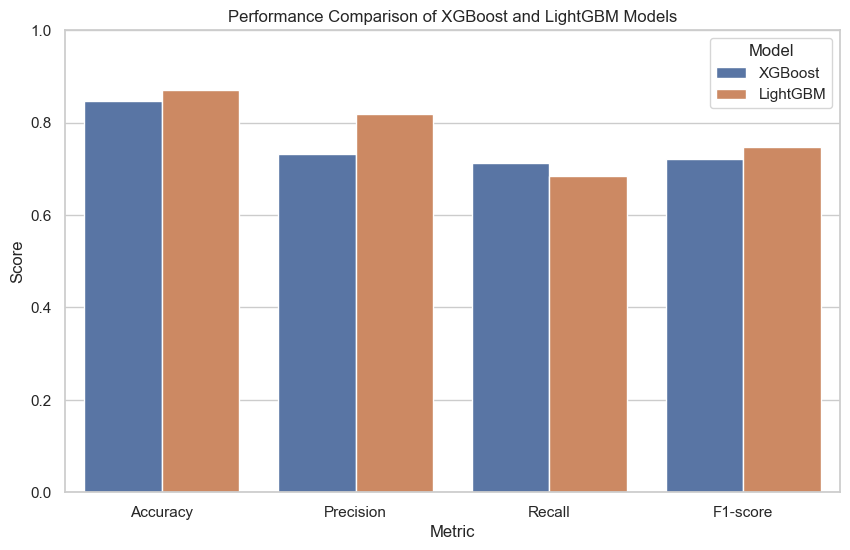

In [48]:
# Set the plot style
sns.set(style="whitegrid")

# Create a bar plot
df_melt = df.melt(id_vars="Metric", var_name="Model", value_name="Score")
plt.figure(figsize=(10, 6))
sns.barplot(x="Metric", y="Score", hue="Model", data=df_melt)

# Add title and labels
plt.title("Performance Comparison of XGBoost and LightGBM Models")
plt.xlabel("Metric")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(title="Model")

# Strengths and Weaknesses:
Strengths of LightGBM and XGBoost:

LightGBM : Higher accuracy and precision, making it more reliable in terms of overall classification and fewer false positives.
Better balance between precision and recall as indicated by the higher F1-score.

Strengths of XGBoost:Higher recall, making it better at identifying positive instances, which is useful when the cost of missing positive instances is high.


# Weaknesses of LightGBMa and XGBoost:

LightGBM:Lower recall compared to XGBoost, indicating that it might miss more positive instances (higher false negatives).

XGBoost: Lower precision, meaning it has more false positives.
Lower overall accuracy and F1-score compared to LightGBM.